In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [24]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    # raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    # raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].bfill()
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ', 'G_MRActP', 'G_MPF', 'G_ADC4', 'F_CuttingTime', 'F_OperationTime'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat([df4,df5,df6,df7], axis=0)
data_all = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

# data['G_MP'] = data['G_MV'] * data['G_MA']
data.dropna(inplace=True)
data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 16:27:17,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:18,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:19,2,10424,0.0,0.0,712.0,21.0,37.099998,38.900002,0.0,220.960007,11.102,2.660,59.970001,45.0


In [3]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, f1_score, roc_auc_score

def verification_train(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

def verification_test(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

# def roc_auc(y, predict):
    fpr, tpr, _ = roc_curve(y, predict)
    auc = roc_auc_score(y, predict)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.text(0.5, 0.3, f'AUC = {auc:.4f}', fontsize=20)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()



def highlight_break(ax, sub_df):
    time_ranges_colors = [('00:00:00', '01:00:00', 'red'),
                          ('05:00:00', '06:00:00', 'blue'),
                          ('12:00:00', '13:00:00', 'green'), 
                          ('17:00:00', '18:00:00', 'magenta')]

    # sub_df의 모든 고유한 날짜를 가져옵니다.
    unique_dates = sub_df.index.normalize().unique()

    for start, end, color in time_ranges_colors:
        for date in unique_dates:
            # 각 날짜와 시간대를 결합하여 시작 및 종료 시간을 생성합니다.
            start_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + start)
            end_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + end)

            ax.fill_between(sub_df.index, 
                            ax.get_ylim()[0], ax.get_ylim()[1], 
                            where=(sub_df.index >= start_time) & (sub_df.index <= end_time), 
                            color=color, alpha=0.3)

def simple_plot(data, date=None, col=None):
    # col이 None인 경우 모든 열을 선택
    if col is None:
        col = data.columns

    start_time = time.time()
    plt.figure(figsize=(20, len(col)*2))

    # date가 None인 경우 전체 날짜 범위를 선택
    if date is None:
        tmp = data[col]
    elif isinstance(date, tuple):
        tmp = data.loc[date[0]:date[1], col]
    else:
        tmp = data.loc[date].copy()

    for i, column in enumerate(tmp.columns):
        ax = plt.subplot(len(tmp.columns), 1, i + 1)
        plt.plot(tmp[column])
        highlight_break(ax, tmp)

        # y축의 범위를 해당 그래프의 최소값과 최대값으로 설정
        plt.ylim(tmp[column].min(), tmp[column].max())

        mask = tmp['F_RunState'] == 2
        for x_position in tmp[mask].index:
            plt.axvline(x=x_position, color='r', alpha=0.1)
        plt.title(column)

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    print(f'소요 시간 : {(end_time - start_time):.2f} 초')

In [6]:
# 정상 데이터
data['label'] = 0

mask1 = (data.index >= pd.Timestamp('2023-06-13 15:31:06')) & (data.index <= pd.Timestamp('2023-06-13 16:40:28'))
mask2 = (data.index >= pd.Timestamp('2023-06-14 02:24:35')) & (data.index <= pd.Timestamp('2023-06-14 03:32:12'))
mask3 = (data.index >= pd.Timestamp('2023-06-05 19:35:30')) & (data.index <= pd.Timestamp('2023-06-05 20:44:09'))
mask4 = (data.index >= pd.Timestamp('2023-06-16 09:21:54')) & (data.index <= pd.Timestamp('2023-06-16 10:29:53'))
mask5 = (data.index >= pd.Timestamp('2023-06-09 06:46:59')) & (data.index <= pd.Timestamp('2023-06-09 07:57:42'))
mask5 = (data.index >= pd.Timestamp('2023-06-09 06:46:59')) & (data.index <= pd.Timestamp('2023-06-09 07:57:42'))
mask6 = (data.index >= pd.Timestamp('2023-06-28 02:51:01')) & (data.index <= pd.Timestamp('2023-06-28 04:03:40'))

mask7 = (data.index >= pd.Timestamp('2023-06-28 13:06:26')) & (data.index <= pd.Timestamp('2023-06-28 14:13:25'))
mask8 = (data.index >= pd.Timestamp('2023-06-28 20:26:31')) & (data.index <= pd.Timestamp('2023-06-28 21:31:51'))
mask8 = (data.index >= pd.Timestamp('2023-06-15 06:44:09')) & (data.index <= pd.Timestamp('2023-06-15 07:54:24'))
mask9 = (data.index >= pd.Timestamp('2023-06-15 09:09:55')) & (data.index <= pd.Timestamp('2023-06-15 10:19:56'))
mask10 = (data.index >= pd.Timestamp('2023-06-15 15:14:25')) & (data.index <= pd.Timestamp('2023-06-15 16:26:26'))
mask11 = (data.index >= pd.Timestamp('2023-06-16 21:08:05')) & (data.index <= pd.Timestamp('2023-06-16 22:21:35'))
mask12 = (data.index >= pd.Timestamp('2023-06-08 15:17:46')) & (data.index <= pd.Timestamp('2023-06-08 16:23:13'))
mask13 = (data.index >= pd.Timestamp('2023-06-21 07:26:50')) & (data.index <= pd.Timestamp('2023-06-21 08:33:53'))
mask14 = (data.index >= pd.Timestamp('2023-06-21 14:13:06')) & (data.index <= pd.Timestamp('2023-06-21 15:18:49'))
mask15 = (data.index >= pd.Timestamp('2023-06-21 03:27:31')) & (data.index <= pd.Timestamp('2023-06-21 04:34:53'))


# 두 마스크를 합침
combined_mask = mask1|mask2|mask3|mask4|mask5|mask6|mask7|mask8|mask9|mask10|mask11|mask12|mask13|mask14|mask15

selected_data = data[combined_mask]
selected_data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp,label
GDatetime,,,,,,,,,,,,,,,
2023-06-05 19:35:30,1,0,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,217.419998,11.170,2.688,59.980000,43.0,0
2023-06-05 19:35:31,1,1,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,217.419998,11.170,2.688,59.980000,43.0,0
2023-06-05 19:35:32,1,2,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,218.279999,12.793,2.840,59.980000,43.0,0
2023-06-05 19:35:33,1,3,0.0,0.0,712.0,21.0,34.700001,30.900000,0.0,217.619995,12.816,2.860,59.980000,43.0,0
2023-06-05 19:35:34,1,4,0.0,0.0,712.0,21.0,34.700001,30.900000,0.0,217.619995,12.816,2.860,59.980000,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 14:13:21,2,10426,0.0,0.0,712.0,21.0,36.400002,38.700001,0.0,213.539993,10.777,2.528,59.990002,45.0,0
2023-06-28 14:13:22,2,10426,0.0,0.0,712.0,21.0,36.500000,38.599998,0.0,213.389999,10.805,2.532,59.990002,45.0,0
2023-06-28 14:13:23,2,10426,0.0,0.0,712.0,21.0,36.500000,38.599998,0.0,213.470001,10.698,2.536,59.990002,45.0,0


In [13]:
# 이상 데이터

mask1 = (data.index >= pd.Timestamp('2023-06-22 18:57:44')) & (data.index <= pd.Timestamp('2023-06-22 19:08:12'))
mask2 = (data.index >= pd.Timestamp('2023-06-23 11:10:38')) & (data.index <= pd.Timestamp('2023-06-23 11:35:08'))
mask3 = (data.index >= pd.Timestamp('2023-06-23 14:08:55')) & (data.index <= pd.Timestamp('2023-06-23 14:20:50'))
mask4 = (data.index >= pd.Timestamp('2023-06-27 10:22:44')) & (data.index <= pd.Timestamp('2023-06-27 10:29:07'))
mask5 = (data.index >= pd.Timestamp('2023-06-29 11:11:21')) & (data.index <= pd.Timestamp('2023-06-29 11:20:20'))
mask6 = (data.index >= pd.Timestamp('2023-07-01 10:56:42')) & (data.index <= pd.Timestamp('2023-07-01 11:14:12'))

# 두 마스크를 합침
combined_mask = mask1 | mask2 | mask3 | mask4 | mask5 | mask6

data.loc[combined_mask, 'label'] = 1
anomaly = data[combined_mask]
anomaly_value = anomaly['label']
data.loc[combined_mask]
anomaly

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp,label
GDatetime,,,,,,,,,,,,,,,
2023-06-22 18:57:44,2,2441,0.0,0.0,712.0,60.0,37.099998,32.400002,0.0,216.300003,12.878,2.800,60.000000,45.0,1
2023-06-22 18:57:45,2,2441,0.0,0.0,712.0,60.0,37.099998,32.400002,0.0,215.880005,12.864,2.828,60.000000,45.0,1
2023-06-22 18:57:46,2,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,215.550003,12.727,2.776,60.000000,45.0,1
2023-06-22 18:57:47,2,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,215.130005,12.786,2.796,60.000000,45.0,1
2023-06-22 18:57:48,2,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,215.130005,12.786,2.796,60.000000,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 11:14:08,4,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,218.809998,12.664,2.768,60.009998,44.0,1
2023-07-01 11:14:09,4,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,218.809998,12.664,2.768,60.009998,44.0,1
2023-07-01 11:14:10,4,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,218.669998,12.705,2.788,60.009998,44.0,1


In [29]:
df = data.copy()

In [30]:
df = df.reset_index()
df = df.drop('GDatetime', axis=1)

# F_CycleTime의 차이 계산 및 라벨링
df['Label'] = (df['F_CycleTime'].shift(1) - df['F_CycleTime']).fillna(2)

# 양수인 라벨의 인덱스 추출
positive_label_indices = df[df['Label'] > 0].index

# 구간별 라벨링
current_label = 1
for i in range(len(positive_label_indices)):
    start_idx = positive_label_indices[i]
    if i < len(positive_label_indices) - 1:
        end_idx = positive_label_indices[i + 1]
    else:
        end_idx = len(df) - 1
    df.loc[start_idx:end_idx, 'Interval_Label'] = current_label
    current_label += 1

# 결과 출력
# data = data.drop(['Label'], axis=1)
# data['GDatetime'] = pd.to_datetime('GDatetime')

In [42]:
# Find the cycles
start_indices = df[df['Label'] > 0].index
end_indices = start_indices[1:].append(pd.Index([len(df)]))

# Extract sequences
sequences = []
for start, end in zip(start_indices, end_indices):
    sequence = df.iloc[start:end].drop(['Label', 'Interval_Label'], axis=1).values
    sequences.append(sequence)

final_sequences = []
for i in sequences:
    if 1800 < len(i) < 7200 :
        final_sequences.append(i)

# Find the maximum sequence length
max_length = max([len(seq) for seq in final_sequences])

# Initialize an empty list to hold the padded sequences
padded_sequences = []

# Iterate through the sequences
for seq in final_sequences:
    # Calculate the required padding length
    padding_length = max_length - len(seq)
    # Pad the sequence with zeros
    padded_seq = np.pad(seq, ((0, padding_length), (0, 0)), 'constant')
    # Append the padded sequence to the list
    padded_sequences.append(padded_seq)

# Stack the padded sequences into a 3D numpy array
final_data = np.stack(padded_sequences)

# The shape of final_data will be (samples, sequences, channels)
print(final_data.shape)

(352, 7150, 14)


In [43]:
len(sequences[0])

1850

In [32]:
# 'Interval_Label' 값별로 딕셔너리에 리스트로 저장
label_shapes = {}

for label in df['Interval_Label'].unique():
    label_data = df[df['Interval_Label'] == label]
    shape = label_data.shape
    label_shapes[label] = shape

# 결과 출력
for label, shape in label_shapes.items():
    print(f'Interval_Label {label}: Shape {shape}')

Interval_Label 1.0: Shape (1850, 16)
Interval_Label 2.0: Shape (3757, 16)
Interval_Label 3.0: Shape (3615, 16)
Interval_Label 4.0: Shape (3868, 16)
Interval_Label 5.0: Shape (6748, 16)
Interval_Label 6.0: Shape (3929, 16)
Interval_Label 7.0: Shape (3683, 16)
Interval_Label 8.0: Shape (4196, 16)
Interval_Label 9.0: Shape (5236, 16)
Interval_Label 10.0: Shape (4503, 16)
Interval_Label 11.0: Shape (3808, 16)
Interval_Label 12.0: Shape (3661, 16)
Interval_Label 13.0: Shape (3621, 16)
Interval_Label 14.0: Shape (7000, 16)
Interval_Label 15.0: Shape (3496, 16)
Interval_Label 16.0: Shape (3647, 16)
Interval_Label 17.0: Shape (3697, 16)
Interval_Label 18.0: Shape (4139, 16)
Interval_Label 19.0: Shape (3812, 16)
Interval_Label 20.0: Shape (4275, 16)
Interval_Label 21.0: Shape (3634, 16)
Interval_Label 22.0: Shape (3724, 16)
Interval_Label 23.0: Shape (3922, 16)
Interval_Label 24.0: Shape (6123, 16)
Interval_Label 25.0: Shape (3854, 16)
Interval_Label 26.0: Shape (3667, 16)
Interval_Label 27.0: 

In [34]:
data

,index,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp,Label,Interval_Label
GDatetime,,,,,,,,,,,,,,,,,
2023-06-05 07:03:45,0,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0,2.0,1.0
2023-06-05 07:03:46,1,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0,0.0,1.0
2023-06-05 07:03:47,2,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0,0.0,1.0
2023-06-05 07:03:48,3,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0,0.0,1.0
2023-06-05 07:03:49,4,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 23:59:55,2353520,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0,0.0,431.0
2023-07-02 23:59:56,2353521,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0,0.0,431.0
2023-07-02 23:59:57,2353522,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.679993,0.063,0.004,59.990002,43.0,0.0,431.0


In [25]:
import plotly.graph_objects as go; import numpy as np
from plotly_resampler import register_plotly_resampler

# Call the register function once and all Figures/FigureWidgets will be wrapped
# according to the register_plotly_resampler its `mode` argument
register_plotly_resampler(mode='auto')


# auto mode: when working in an IPython environment, this will automatically be a 
# FigureWidgetResampler else, this will be an FigureResampler
f = go.Figure()
f.add_trace({"x":data.index, "y":data['F_RunState'], "name": "F_RunState"})
f.add_trace({"x":data.index, "y":data['F_CycleTime'], "name": "F_CycleTime"})
f.add_trace({"x":data.index, "y":data['G_ADC3'], "name": "G_ADC3"})
f.add_trace({"x":data.index, "y":data['F_ToolNum'], "name": 'F_ToolNum'})
f.add_trace({"x":data.index, "y":data['G_MV'], "name": "G_MV"})
f.add_trace({"x":data.index, "y":data['G_MA'], "name": "G_MA"})
f.add_trace({"x":data.index, "y":data['G_MFeq'], "name": "G_MFeq"})
f.add_trace({"x":data.index, "y":data['G_MTemp'], "name": "G_MTemp"})
f

FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> F_RunState <i style="color:#fc9944">~2k</i>',
              'type': 'scatter',
              'uid': '9be02083-7097-45ff-92e6-0335f5960482',
              'x': array([      0,    1178,    2355, ..., 2347640, 2349993, 2353524], dtype=int64),
              'y': array([2, 4, 1, ..., 0, 0, 0], dtype=int64)},
             {'name': '<b style="color:sandybrown">[R]</b> F_CycleTime <i style="color:#fc9944">~2k</i>',
              'type': 'scatter',
              'uid': 'ad5cfea4-4611-4d6a-980a-63747c310567',
              'x': array([      0,    1850,    4708, ..., 2347640, 2349993, 2353524], dtype=int64),
              'y': array([   0,    0, 5101, ...,    0,    0,    0], dtype=int64)},
             {'name': '<b style="color:sandybrown">[R]</b> G_ADC3 <i style="color:#fc9944">~2k</i>',
              'type': 'scatter',
              'uid': 'b5adc216-ade9-47d7-bfb9-64b6b94c259f',
              'x': array([      0,

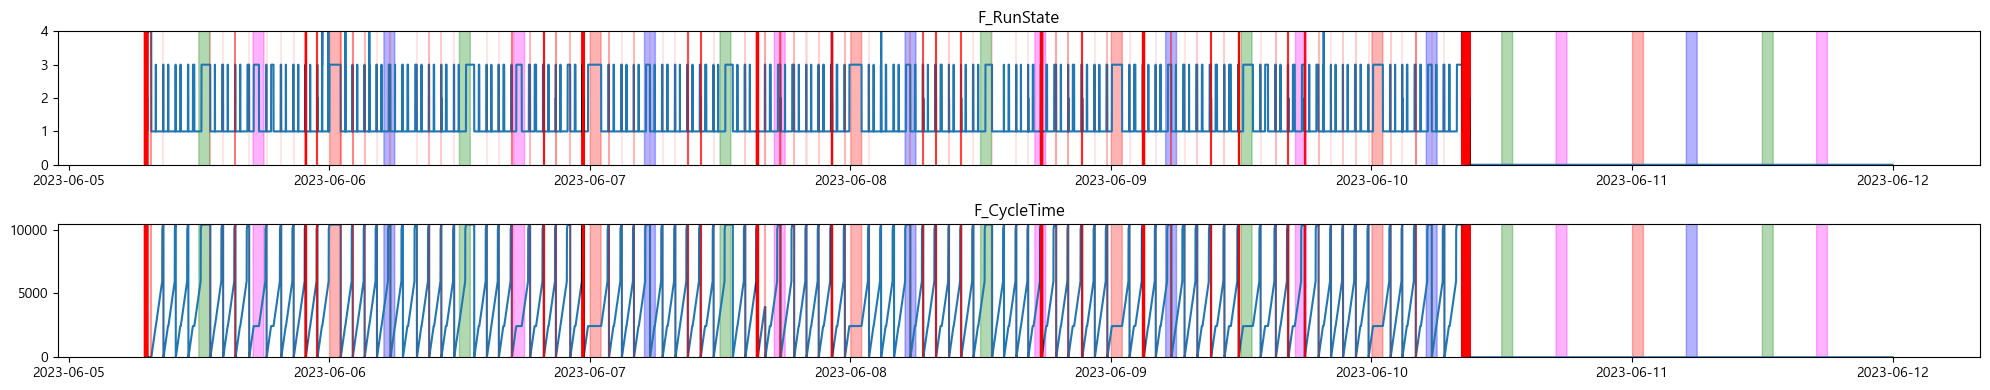

소요 시간 : 4.38 초


In [22]:
simple_plot(df4, col=['F_RunState','F_CycleTime'])

In [23]:
df4

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,13.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,13.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,13.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,13.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,13.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11 23:59:55,0,0,0.0,0.0,0.0,NaN,27.000000,57.299999,0.0,228.289993,0.063,0.004,60.020000,41.0
2023-06-11 23:59:56,0,0,0.0,0.0,0.0,NaN,27.000000,57.299999,0.0,228.289993,0.063,0.004,60.020000,41.0
2023-06-11 23:59:57,0,0,0.0,0.0,0.0,NaN,27.000000,57.299999,0.0,228.229996,0.063,0.004,60.020000,41.0
